In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"07b63f41-f21c-4b6b-bec5-3943eaa80550\"")

In [ ]:
hex_project_name = _hex_json.loads("\"[David Camper] Gender Differences in Family Structure \"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

### Research Question:

Does the parenthood penalty have a significantly different effect on men and women's earnings, when compared between male-dominated or female-dominated fields in the private, for profit sector? 

### Hypothesis:

Our hypothesis is that as the degree type elevates to a higher level of education, the parenthood penalty will come with diminishing effects on women's average salary and earnings in the private, for-profit field.



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import csv


Read in data



In [ ]:
# import jinja2
# raw_query = """
#     select * from nscg_2021.csv
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Clean up data and create new variables for analysis



In [ ]:
# import jinja2
# raw_query = """
#     select
#         cast(salary as int) as salary, --capped at 9999996 - As of the week of February 1, 2021, what was your basic annual salary on your principal job, before deductions?
#         if (
#             cast(wkswk as int) = 98,
#             null,
#             cast(wkswk as int)
#         ) as wkswk, --Principal job salary: weeks per year basis; 98 is a logical skip
#         if (
#             cast(earn as int) = 9999998,
#             null,
#             cast(earn as int)
#         ) as earn, --capped at 9999996 Total earned income before deductions in previous year so need to also select those who worked last year
#         supwk,  --Supervised others in principal job indicator
#         wamgmt, --Work activity on principal job 10% indicator managing or supervising people/project
#         case
#             when
#                 cast(supdir as int) = 9998
#                 then null
#             else cast(supdir as int)
#         end as supdir,
#         case
#             when
#                 cast(supind as int) = 99998
#                 then null
#             else cast(supind as int)
#         end as supind,
#         case
#             when cast(emsmi as int) = 1
#                 then 'same_employer_same_job'
#             when cast(emsmi as int) = 2
#                 then 'same_employer_different_job'
#             when cast(emsmi as int) = 3
#                 then 'different_employer_same_job'
#             when cast(emsmi as int) = 4
#                 then 'different_employer_different_job'
#             else null
#         end as emsmi,  --During these two time periods - the week of February 1, 2019, and the week of February 1, 2021 were you working for?
#         if(
#             gender = 'F',
#             1,
#             0
#         )
#         as gender,
#         white,
#         case
#             when cast(racethm as int) = 1
#                 then 'asian'
#             when cast(racethm as int) = 2
#                 then 'american_indian_alaskan'
#             when cast(racethm as int) = 3
#                 then 'black'
#             when cast(racethm as int) = 4
#                 then 'hispanic'
#             when cast(racethm as int) = 5
#                 then 'white'
#             when cast(racethm as int) = 6
#                 then 'pacific_islander'
#             when cast(racethm as int) = 7
#                 then 'multiple_race_non_hispanic'
#             end as racethm,
#         case
#             when resploc = '01'
#                 then 'new_england'
#             when resploc = '02'
#                 then 'middle_atlantic'  
#             when resploc = '03'
#                 then 'east_north_central'
#             when resploc = '04'
#                 then 'west_north_central' 
#             when resploc = '05'
#                 then 'south_atlantic'
#             when resploc = '06'
#                 then 'east_south_central' 
#             when resploc = '07'
#                 then 'west_south_central'
#             when resploc = '08'
#                 then 'mountain'
#             when resploc = '09'
#                 then 'pacific_us_territories'
#             when resploc = '10'
#                 then 'europe'
#             when resploc = '20'
#                 then 'asia'
#             when resploc = '33'
#                 then 'caribbean'
#             when resploc = '37'
#                 then 'south_america'
#             when resploc = '40'
#                 then 'africa'
#             when resploc = '55'
#                 then 'abroad_unspecified'
#             end as resploc,
#         ctzusin, --us citizen
#         cast(refyr as int) as refyr, --year of survey
#         cast(biryr as int) as biryr, --birth year
#         agegr, --Age Group (5 year intervals)
#         cast(strtyr as int) as strtyr, --Year principal job started
#         prmbr, --Number of professional society memberships
#         promtgi, -- attended prof meetings
#         wktrni, -- attended trainings
#         if (cast(hrswk as int) = 98,
#             null,
#             hrswk) as hrswk, --capped at 96 hours a week
#         case
#             when cast(n2ocprbg as int) = 1
#                 then 'S&E'
#             when cast(n2ocprbg as int) = 2
#                 then 'S&E_related'
#             when cast(n2ocprbg as int) = 3
#                 then 'non_S&E'
#             else null
#             end as n2ocprbg, --Job code for principal job broad group SE based
#         case
#             when cast(n2ocprmg as int) = 1
#                 then 'computer_scientists'
#             when cast(n2ocprmg as int) = 2
#                 then 'bio_life_scientists'
#             when cast(n2ocprmg as int) = 3
#                 then 'physical_scientists_related'
#             when cast(n2ocprmg as int) = 4
#                 then 'social_scientists_related'
#             when cast(n2ocprmg as int) = 5
#                 then 'engineers'
#             when cast(n2ocprmg as int) = 6
#                 then 'S&E_related_occupations'
#             when cast(n2ocprmg as int) = 7
#                 then 'non-S&E_occupations'
#             else null
#             end as occupation_group,
#         n3ocpr, --Job code for principal job best code, includes Top-level managers, execs, admins (711410) and OTHER mid-level managers (711470)
#         case when 
#             n3ocpr in (621420, 621430,621440, 621450, 711460, 711470) 
#                 then 'mid_level_manager'
#             when n3ocpr = 711410
#                 then 'c_suite_manager'
#             when n3ocpr = 721520
#                 then 'personnel_mgmt'
#             when n3ocpr = 721510
#                 then 'financial_mgmt'
#             when n3ocpr = 721530
#                 then 'other_management_occupations'
#             else null
#             end as leadership_job_codes,
#         case when 
#             n3ocpr = 621420
#                 then 'computer_it_managers'
#             when n3ocpr = 621430
#                 then 'eng_managers'
#             when n3ocpr = 621440
#                 then 'medical_health_manager'
#             when n3ocpr = 621450
#                 then 'natural_science_manager'
#             when n3ocpr = 711460
#                 then 'ed_administrators'
#             when n3ocpr = 711470
#                 then 'other_mid_level_manager'
#             when n3ocpr = 711410
#                 then 'c_suite_manager'
#             when n3ocpr = 721520
#                 then 'personnel_mgmt'
#             when n3ocpr = 721510
#                 then 'financial_mgmt'
#             when n3ocpr = 721530
#                 then 'other_management_occupations'
#             else null
#             end as leadership_job_titles,
#         case 
#             when cast(n3ocprng as int) = 11 then 'computer_information_scientists' 
#             when cast(n3ocprng as int) = 12 then 'mathematical_scientists'
#             when cast(n3ocprng as int) = 18 then 'postsecondary teachers_computer_and_math'
#             when cast(n3ocprng as int) = 21 then 'agricultural_food_scientists'
#             when cast(n3ocprng as int) = 22 then 'biological_medical_scientists' 
#             when cast(n3ocprng as int) = 23 then 'environmental_life_scientists'
#             when cast(n3ocprng as int) = 28 then 'postsecondary_teachers_life_related_sciences'
#             when cast(n3ocprng as int) = 31 then 'chemists_except_biochemists'
#             when cast(n3ocprng as int) = 32 then 'earth_atmospheric_ocean_scientists'
#             when cast(n3ocprng as int) = 33 then 'physicists'
#             when cast(n3ocprng as int) = 34 then 'other_physical_related_scientists'
#             when cast(n3ocprng as int) = 38 then 'postsecondary_teachers_physical_and_related_sciences'
#             when cast(n3ocprng as int) = 41 then 'economists'
#             when cast(n3ocprng as int) = 42 then 'political_scientists'
#             when cast(n3ocprng as int) = 43 then 'psychologists'
#             when cast(n3ocprng as int) = 44 then 'anthropologists'
#             when cast(n3ocprng as int) = 45 then 'other_social_related_scientists'
#             when cast(n3ocprng as int) = 48 then 'postsecondary_teachers_social_related_sciences'
#             when cast(n3ocprng as int) = 51 then 'aerospace_aeronautical_astronautical_engineers'
#             when cast(n3ocprng as int) = 52 then 'chemical_engineers'
#             when cast(n3ocprng as int) = 53 then 'civil_architectural_sanitary_engineers'
#             when cast(n3ocprng as int) = 54 then 'electrical_computer_hardware_engineers'
#             when cast(n3ocprng as int) = 55 then 'industrial_engineers'
#             when cast(n3ocprng as int) = 56 then 'mechanical_engineers'
#             when cast(n3ocprng as int) = 57 then 'other_engineers'
#             when cast(n3ocprng as int) = 58 then 'postsecondary_teachers_engineering'
#             when cast(n3ocprng as int) = 61 then 'health_related_occupations'
#             when cast(n3ocprng as int) = 62 then 'S&E_managers'
#             when cast(n3ocprng as int) = 63 then 'S&E_pre_college_teachers'
#             when cast(n3ocprng as int) = 64 then 'S&E_technicians_and_technologists'
#             when cast(n3ocprng as int) = 65 then 'other_S&E_related_occupations'
#             when cast(n3ocprng as int) = 71 then 'non_S&E_managers'
#             when cast(n3ocprng as int) = 72 then 'management_related_occupations' 
#             when cast(n3ocprng as int) = 73 then 'non_S&E_precollege_teachers'
#             when cast(n3ocprng as int) = 74 then 'non_S&E_postsecondary_teachers' 
#             when cast(n3ocprng as int) = 75 then 'social_services_related_occupations' 
#             when cast(n3ocprng as int) = 76 then 'sales_marketing_occupations' 
#             when cast(n3ocprng as int) = 77 then 'art_humanities_related_occupations' 
#             when cast(n3ocprng as int) = 78 then 'other_non_S&E_occupations' 
#             else null
#             end as principal_job,
#         case
#             when wapri = '01'
#             then 'accounting_finance_contracts'
#             when wapri = '02'
#             then 'basic_research'
#             when wapri = '03'
#             then 'applied_research'
#             when wapri = '04'
#             then 'reasearch_dev_materials_devices'
#             when wapri = '05'
#             then 'design_equipment_processes_structures_models'
#             when wapri = '06'
#             then 'computer_apps_programming_systems_dev'
#             when wapri = '07'
#             then 'human_resources'
#             when wapri = '08'
#             then 'managing_supervising_people_projects'
#             when wapri = '09'
#             then 'production_operations_maintenance'
#             when wapri = '10'
#             then 'professional_services'
#             when wapri = '11'
#             then 'sales_purchasing_marketing'
#             when wapri = '12'
#             then 'quality_productivity_management'
#             when wapri = '13'
#             then 'teaching'
#             when wapri = '14'
#             then 'other_work_activity'
#             else null
#             end as wapri,  --Work activity spent most hours on in principal job - like dept
#         wasec,  --Work activity spent second most hours on in principal job
#         newbus, --within 5 years founded
#         case
#             when cast(nedtp as int) = 1 then 'self_employed_not_incorp'
#             when cast(nedtp as int) = 2 then 'self_employed_incorp'
#             when cast(nedtp as int) = 3 then 'private_for_profit_org'
#             when cast(nedtp as int) = 4 then 'private_not_for_profit_org'
#             when cast(nedtp as int) = 5 then 'local_government'
#             when cast(nedtp as int) = 6 then 'state_government'
#             when cast(nedtp as int) = 7 then 'military'
#             when cast(nedtp as int) = 8 then 'federal_government'
#             when cast(nedtp as int) = 9 then 'other_employer_type'
#         else null
#         end as employer_type,
#         case
#             when cast(emsecsm as int) = 1 then 'educational_institutution'
#             when cast(emsecsm as int) = 2 then 'government'
#             when cast(emsecsm as int) = 3 then 'business'
#         else null
#         end as sector, -- Employer sector --1: Educational Institution 2: Government 3: Business/Industry
#         case when 
#             emsize = 1
#             then '10_or_fewer_employees'
#         when emsize = 2
#             then '11_to_24_employees'
#         when emsize = 3
#             then '25_to_99_employees'
#         when emsize = 4
#             then '100_to_499_employees'
#         when emsize = 5
#             then '500_to_999_employees'
#         when emsize = 6
#             then '1000_to_4999_employees'
#         when emsize = 7
#             then '5000_to_24999_employees'
#         when emsize = 8
#             then '25000+_employees'
#         else null
#         end as emsize,
#         case 
#         when emsize = 1
#             then 10
#         when emsize = 2
#             then round(11 + (24-11)/2)
#         when emsize = 3
#             then round(25 + (99-25)/2)
#         when emsize = 4
#             then round(100 + (499-100)/2)
#         when emsize = 5
#             then round(500 + (999-500)/2)
#         when emsize = 6
#             then round(1000 + (4999-1000)/2)
#         when emsize = 7
#             then round(5000 + (24999-5000)/2)
#         when emsize = 8
#             then 25000
#         else null
#         end as emsize_midpoint,
#         case
#             when emrg = '01'
#                 then 'new_england'
#             when emrg = '02'
#                 then 'middle_atlantic'  
#             when emrg = '03'
#                 then 'east_north_central'
#             when emrg = '04'
#                 then 'west_north_central' 
#             when emrg = '05'
#                 then 'south_atlantic'
#             when emrg = '06'
#                 then 'east_south_central' 
#             when emrg = '07'
#                 then 'west_south_central'
#             when emrg = '08'
#                 then 'mountain'
#             when emrg = '09'
#                 then 'pacific_us_territories'
#             when emrg = '10'
#                 then 'europe'
#             when emrg = '20'
#                 then 'asia'
#             when emrg = '33'
#                 then 'caribbean'
#             when emrg = '37'
#                 then 'south_america'
#             when emrg = '40'
#                 then 'africa'
#             else null 
#             end as emrg,
#         case when
#             emst = '085' then 'new_england'
#             when emst = '086' then 'mid_atlantic'
#             when emst = '087' then 'east_north_central'
#             when emst = '088' then 'west_north_central'
#             when emst = '089' then 'south_atlantic'
#             when emst = '090' then 'east_south_central'
#             when emst = '091' then 'west_south_central'
#             when emst = '092' then 'mountain'
#             when emst = '093' then 'pacific_region'
#             when emst = '096' then 'not_specified'
#             else null
#         end as emst,
#         case
#             when cast(jobsatis as int) = 1
#                 then 'very_satisfied'
#             when cast(jobsatis as int) = 2
#                 then 'somewhat_satisfied'
#             when cast(jobsatis as int) = 3
#                 then 'somewhat_dissatisfied'
#             when cast(jobsatis as int) = 4
#                 then 'very_dissatisfied'
#             end as jobsatis,
#         case
#             when
#                 cast(wkslyr as int) = 98 --logical skip
#                 then 52 
#             else cast(wkslyr as int)
#         end as wkslyr, --Number of weeks worked per year if less than 52 weeks
#         cast(refyr as int) - cast(strtyr as int) as years_at_job,
#         case
#             when
#                 wksyr = 1 --Was this salary based on a 52-week year, or less than that? 1 = worked 52 weeks per year
#                 then 1
#             else 0
#         end as fiftytwo_wksyr,
#         cast(refyr as int) - cast(dgryr as int) as years_since_highest_degree,
#         cast(refyr as int) - cast(mryr as int) as years_since_most_recent_degree,
#         cast(refyr as int) - cast(bayr as int) as years_since_first_ba,
#         cast(bsdgn as int) as bsdgn, --Number of bachelor's or higher degrees
#         cast(bayr as int) as bayr,
#         baind, --Indicator of whether respondent received a BA-level degree
#         hdcarn,
#         n2dgrmed, -- Field of study for highest degree - best code
#         ndgmebg, --Field of study for highest degree broad group - SE based
#         case 
#         when n2dgrmed like '116%'
#             then 'computer_and_info_sciences'
#         when n2dgrmed like '128%'
#             then 'math'
#         when n2dgrmed like '216%'
#             then 'agricultural_sciences'    
#         when n2dgrmed like '226%'
#             then 'biological_sciences'
#         when n2dgrmed like '236%'
#             then 'environmental_sciences'
#         when n2dgrmed like '318%'
#             then 'chemistry'
#         when n2dgrmed like '328%'
#             then 'geological_sciences'
#         when n2dgrmed like '338%'
#             then 'physics'
#         when n2dgrmed like '348%'
#             then 'other_physical_sciences'
#         when n2dgrmed like '416%'
#             then 'ag_economics'
#         when n2dgrmed like '419%'
#             then 'economics'
#         when n2dgrmed like '429%'
#             then 'political_sciences'
#         when n2dgrmed like '437%'
#             then 'ed_psycholology'
#         when n2dgrmed like '438%'
#             then 'psycholology'
#         when n2dgrmed like '449%'
#             then 'sociology_anthropology'
#         when n2dgrmed like '456%'
#             then 'ethnic_studies'
#         when n2dgrmed like '457%'
#             then 'linguistics'
#         when n2dgrmed like '458%'
#             then 'philosophy'
#         when n2dgrmed like '459%'
#             then 'geography'
#         when n2dgrmed like '517%'
#             then 'aerospace_eng'
#         when n2dgrmed like '527%'
#             then 'chem_eng'
#         when n2dgrmed like '537%'
#             then 'civil_arch_eng'
#         when n2dgrmed like '547%'
#             then 'computer_eng'
#         when n2dgrmed like '557%'
#             then 'industrial_eng'
#         when n2dgrmed like '567%'
#             then 'mechanical_eng'
#         when n2dgrmed like '577%'
#             then 'bio_eng'
#         when n2dgrmed like '617%'
#             then 'health_medical_sciences'
#         when n2dgrmed like '627%'
#             then 'specialized_teacher_education'
#         when n2dgrmed like '636%'
#             then 'computer_programming'
#         when n2dgrmed like '637%'
#             then 'other_eng'
#         when n2dgrmed like '6461%'
#             then 'architects'
#         when n2dgrmed like '6465%'
#             then 'acutuaries'
#         when n2dgrmed like '716%'
#             then 'business_management'
#         when n2dgrmed like '727%'
#             then 'education'
#         when n2dgrmed like '738%'
#             then 'theology'
#         when n2dgrmed like '739%'
#             then 'social_work'
#         when n2dgrmed like '746%'
#             then 'marketing'
#         when n2dgrmed like '757%'
#             then 'literature_language'
#         when n2dgrmed like '758%'
#             then 'liberal_arts'
#         when n2dgrmed like '7592%'
#             then 'history'
#         when n2dgrmed like '7594%'
#             then 'arts'
#         when n2dgrmed like '7666%'
#             then 'journalism_communications'
#         when n2dgrmed like '7666%'
#             then 'journalism_communications'
#         when n2dgrmed like '7668%'
#             then 'conservation'
#         when n2dgrmed like '7669%'
#             then 'criminal_justice'
#         when n2dgrmed like '7680%'
#             then 'home_econ'
#         when n2dgrmed like '7681%'
#             then 'law'
#         when n2dgrmed like '7683%'
#             then 'library_science'        
#         when n2dgrmed like '7685%'
#             then 'parks_and_rec'
#         when n2dgrmed like '7690%'
#             then 'public_admin'
#         when n2dgrmed = '769950'
#             then 'other'
#         else null
#         end as highest_degree_field,
#         case
#             when cast(ndgmemg as int) = 1
#                 then 'computer_math_sciences'
#             when cast(ndgmemg as int) = 2
#                 then 'life_sciences'
#             when cast(ndgmemg as int) = 3
#                 then 'physical_related_sciences'
#             when cast(ndgmemg as int) = 4
#                 then 'social_related_sciences'
#             when cast(ndgmemg as int) = 5
#                 then 'engineering'
#             when cast(ndgmemg as int) = 6
#                 then 'S&E_related_fields'
#             when cast(ndgmemg as int) = 7
#                 then 'non_S&E_fields'
#             end as highest_general_degree_field,
#         ndgmeng, -- Field of study for highest degree minor group
#         case
#             when
#                 dgrdg = 1
#                 then 'Bachelors'
#             when
#                 dgrdg = 2
#                 then 'Masters'
#             when
#                 dgrdg = 3
#                 then 'Doctorate'
#             when
#                 dgrdg = 4
#                 then 'Professional'
#         end as highest_degree_type,
#         spnat, --Technical expertise required by spouse/partner job: engineering, computer, math, natural sciences
#         spot, --Technical expertise required by spouse/partner job: other
#         spsoc, --Technical expertise required by spouse/partner Job: social sciences
#         case 
#             when spowk = 1
#                 then 'full_time'
#             when spowk = 2   
#                 then 'part_time'
#             when spowk = 3   
#                 then 'non_working'   
#             else 'not_partnered' 
#         end as partner_work,
#         marind,
#         case 
#             when cast(marsta as int) = 1
#                 then 'married'
#             when cast(marsta as int) = 2
#                 then 'living_with_partner'
#             when cast(marsta as int) = 3
#                 then 'widowed'
#             when cast(marsta as int) = 4
#                 then 'separated'
#             when cast(marsta as int) = 5
#                 then 'divorced'
#             when cast(marsta as int) = 6
#                 then 'never_married'
#         end as marsta,
#         chlvin, --Children living in household indicator (all ages)
#         CASE 
#             WHEN (CAST(marsta AS int) = 1 OR CAST(marsta AS int) = 2) AND chlvin = 1 THEN 1
#             ELSE 0
#         END AS partnered_with_children,
#         ch6in,
#         chun12, 
#         case
#             when
#                 cast(chu2 as int) = 98
#                 then null
#             else cast(chu2 as int)
#         end as chu2,
#         case
#             when
#                 cast(ch25 as int) = 98
#                 then null
#             else cast(ch25 as int)
#         end as ch25,
#         case
#             when
#                 cast(ch6 as int) = 98
#                 then null
#             else cast(ch6 as int)
#         end as ch6,
#         case
#             when
#                 cast(ch611 as int) = 98
#                 then null
#             else cast(ch611 as int)
#         end as ch611,
#         case
#             when
#                 cast(ch1218 as int) = 98
#                 then null
#             else cast(ch1218 as int)
#         end as ch1218,
#         case
#             when
#                 cast(ch19 as int) = 98
#                 then null
#             else cast(ch19 as int)
#         end as ch19,
#         lfstat,
#         resplcus
#     from df
#     where df.lfstat = 1 --employed workforce
#     and df.resplcus = 1 --respondents in US
#     and baind = 1 --Indicator of whether respondent received a BA-level degree
#     and agegr < 67 -- retirement age
#     and salary > 15080 --minimum wage in dollars per year for full-time workers
#     and earn > 15080
#     --and employer_type = 'private_for_profit_org'
#     and hrswk >=30 -- full time workers
#     and fiftytwo_wksyr = 1 --salary based on 52 weeks worked last year
#     and employer_type not in 
#         (
#         'military',
#         'other_employer_type',
#         'self_employed_not_incorp',
#         'self_employed_incorp'
#         )
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Descriptive Statistics



## Who is included in this sample?

- lfstat = 1 --employed workforce
- and resplcus = 1 --respondents in US
- and baind = 1 --Indicator of whether respondent received a BA-level degree
- and agegr < 67 -- retirement age
- and salary > 15080 --minimum wage in dollars per year for full-time workers
- and earn > 15080 - earnings last year also exceeded minimum wage in dollars per year for full-time workers
- and hrswk >=30 -- full time workers
- and fiftytwo_wksyr = 1 --salary based on 52 weeks worked last year
- and employer_type not in     ( 'military',    'other_employer_type',    'self_employed_not_incorp',    'self_employed_incorp'    )



Create new variables



In [ ]:
data.loc[(data['employer_type'] == 'private_for_profit_org') & (data['sector'] == 'business'), 'private_corp'] = 1
data.loc[data['private_corp'].isnull(), 'private_corp'] = 0
data['private_corp'].describe()

count    58207.000000
mean         0.606319
std          0.488570
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: private_corp, dtype: float64

## By Principal Job and Sector



In [ ]:
# import jinja2
# raw_query = """
#     with average_earnings_by_gender as (
#         select
#             gender,
#             principal_job,
#             sector,
#             round(avg(earn), 2) as average_earnings,
#             count(*) as number_of_respondents
#         from data
#         group by gender, principal_job, sector
#     ),
#     
#     
#     women as (
#         select
#             average_earnings,
#             number_of_respondents as number_female_respondents,
#             principal_job,
#             sector
#         from average_earnings_by_gender
#         where gender = 1
#     ),
#     
#     men as (
#         select
#             average_earnings,
#             number_of_respondents as number_male_respondents,
#             principal_job,
#             sector
#         from average_earnings_by_gender
#         where gender = 0
#     ),
#     
#     percent_female as (
#         select
#             principal_job,
#             sector,
#             avg(gender) as percent_female
#         from data
#         group by principal_job, sector
#     )
#     
#     select * from 
#         (
#             select
#                 women.principal_job,
#                 women.sector,
#                 percent_female,
#                 (
#                     women.number_female_respondents + men.number_male_respondents
#                 ) as total_respondents,
#                 number_female_respondents,
#                 number_male_respondents,
#                 women.average_earnings as average_women_earnings,
#                 men.average_earnings as average_men_earnings,
#                 round(women.average_earnings / men.average_earnings, 2) as gender_earnings_gap
#             from women
#             inner join
#                 men
#                 on
#                     women.principal_job = men.principal_job
#                     and women.sector = men.sector
#             inner join
#                 percent_female
#                 on
#                     women.principal_job = percent_female.principal_job
#                     and women.sector = percent_female.sector
#         ) where total_respondents > 25
#     
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     SELECT
#         PERCENTILE_CONT(0.99) WITHIN GROUP (
#             ORDER BY total_respondents
#         ) AS upper_99th_percentile,
#         PERCENTILE_CONT(0.10) WITHIN GROUP (
#             ORDER BY total_respondents
#         ) AS lower_99th_percentile
#     FROM
#         gender_gap_by_job_sector
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In python



In [ ]:
average_earnings_by_gender = (
    data.groupby(['gender', 'principal_job', 'sector'])
        .agg(
            average_earnings=('earn', 'mean'),
            number_of_respondents=('earn', 'size')
        )
        .reset_index()
)


average_earnings_by_gender['average_earnings'] = average_earnings_by_gender['average_earnings'].round(2)


women = average_earnings_by_gender[average_earnings_by_gender['gender'] == 1][['average_earnings', 'number_of_respondents', 'principal_job', 'sector']]
women = women.rename(columns={'number_of_respondents': 'number_female_respondents'})

men = average_earnings_by_gender[average_earnings_by_gender['gender'] == 0][['average_earnings', 'number_of_respondents', 'principal_job', 'sector']]
men = men.rename(columns={'number_of_respondents': 'number_male_respondents'})


percent_female = (
    data.groupby(['principal_job', 'sector'])
        .agg(percent_female=('gender', 'mean'))
        .reset_index()
)


merged_data = (
    women.merge(men, on=['principal_job', 'sector'], suffixes=('_women', '_men'))
         .merge(percent_female, on=['principal_job', 'sector'])
)


merged_data['total_respondents'] = merged_data['number_female_respondents'] + merged_data['number_male_respondents']
merged_data['gender_earnings_gap'] = (merged_data['average_earnings_women'] / merged_data['average_earnings_men']).round(2)


result = merged_data[merged_data['total_respondents'] > 25]


result[[
    'principal_job', 
    'sector', 
    'percent_female', 
    'total_respondents', 
    'number_female_respondents', 
    'number_male_respondents', 
    'average_earnings_women', 
    'average_earnings_men', 
    'gender_earnings_gap'
]]




,principal_job,sector,percent_female,total_respondents,number_female_respondents,number_male_respondents,average_earnings_women,average_earnings_men,gender_earnings_gap
0,S&E_managers,business,0.287561,1857,534,1323,147194.08,185991.77,0.79
1,S&E_managers,educational_institutution,0.530973,113,60,53,105245.80,135336.38,0.78
2,S&E_managers,government,0.312329,365,114,251,108069.04,130720.38,0.83
3,S&E_pre_college_teachers,educational_institutution,0.520165,1215,632,583,62798.84,70019.97,0.90
4,S&E_technicians_and_technologists,business,0.206944,2189,453,1736,96412.60,110550.82,0.87
...,...,...,...,...,...,...,...,...,...
95,sales_marketing_occupations,educational_institutution,0.727273,44,32,12,75503.88,80463.67,0.94
96,sales_marketing_occupations,government,0.500000,40,20,20,86760.10,90367.10,0.96
97,social_services_related_occupations,business,0.718686,974,700,274,53729.75,56560.95,0.95
98,social_services_related_occupations,educational_institutution,0.796748,369,294,75,58362.74,59451.29,0.98


In [ ]:
import altair
chart_gender_gap_by_job_sector = altair.Chart.from_json(r"""
{
    "width": 500,
    "height": 500,
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "facet": {
        "row": {
            "field": "sector",
            "title": "sector"
        }
    },
    "spec": {
        "layer": [
            {
                "description": "outer data layer",
                "layer": [
                    {
                        "description": "series data layer",
                        "name": "series_a4cc798b-d502-4b85-8732-d8cab3db04e7",
                        "layer": [
                            {
                                "description": "bar series layer",
                                "transform": [],
                                "layer": [
                                    {
                                        "description": "bar mark layer",
                                        "mark": {
                                            "type": "bar",
                                            "clip": true,
                                            "filled": true,
                                            "cursor": "pointer",
                                            "orient": "vertical"
                                        },
                                        "encoding": {
                                            "opacity": {
                                                "value": 1
                                            },
                                            "tooltip": [
                                                {
                                                    "field": "principal_job",
                                                    "type": "ordinal",
                                                    "title": "principal_job"
                                                },
                                                {
                                                    "field": "percent_female",
                                                    "type": "quantitative",
                                                    "formatType": "NUMBER_FORMATTER",
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    },
                                                    "title": "% female"
                                                },
                                                {
                                                    "field": "gender_earnings_gap",
                                                    "type": "quantitative",
                                                    "formatType": "NUMBER_FORMATTER",
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    },
                                                    "title": "gender_earnings_gap"
                                                }
                                            ],
                                            "color": {
                                                "field": "gender_earnings_gap",
                                                "type": "quantitative",
                                                "scale": {
                                                    "scheme": "spectral",
                                                    "reverse": true
                                                },
                                                "legend": {
                                                    "formatType": "NUMBER_FORMATTER",
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    }
                                                },
                                                "title": "gender_earnings_gap"
                                            },
                                            "x": {
                                                "field": "principal_job",
                                                "type": "ordinal",
                                                "title": "principal_job",
                                                "scale": {},
                                                "axis": {
                                                    "grid": true,
                                                    "ticks": true,
                                                    "labels": true,
                                                    "labelAngle": -45,
                                                    "labelFlush": false
                                                }
                                            },
                                            "y": {
                                                "field": "percent_female",
                                                "type": "quantitative",
                                                "title": "% female",
                                                "scale": {},
                                                "axis": {
                                                    "grid": true,
                                                    "ticks": true,
                                                    "labels": true,
                                                    "labelFlush": false,
                                                    "format": {
                                                        "format": "NUMBER",
                                                        "columnType": "NUMBER",
                                                        "numDecimalDigits": -1,
                                                        "currency": "USD",
                                                        "nanFormat": ""
                                                    },
                                                    "formatType": "NUMBER_FORMATTER"
                                                }
                                            }
                                        }
                                    }
                                ],
                                "encoding": {
                                    "x": {
                                        "field": "principal_job",
                                        "type": "ordinal",
                                        "title": "principal_job",
                                        "scale": {},
                                        "axis": {
                                            "grid": true,
                                            "ticks": true,
                                            "labels": true,
                                            "labelAngle": -45,
                                            "labelFlush": false
                                        }
                                    },
                                    "y": {
                                        "field": "percent_female",
                                        "type": "quantitative",
                                        "title": "% female",
                                        "scale": {},
                                        "axis": {
                                            "grid": true,
                                            "ticks": true,
                                            "labels": true,
                                            "labelFlush": false,
                                            "format": {
                                                "format": "NUMBER",
                                                "columnType": "NUMBER",
                                                "numDecimalDigits": -1,
                                                "currency": "USD",
                                                "nanFormat": ""
                                            },
                                            "formatType": "NUMBER_FORMATTER"
                                        }
                                    }
                                }
                            }
                        ]
                    }
                ],
                "transform": []
            }
        ],
        "width": 200,
        "height": 200
    },
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "data": {
        "name": "gender_gap_by_job_sector"
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {},
        "columnNameMappings": {
            "CHART_FOLD_KEYS": "Column",
            "CHART_FOLD_VALUES": "Values"
        }
    },
    "layer": []
}
""")
chart_gender_gap_by_job_sector.datasets.layer00 = gender_gap_by_job_sector.to_json(orient='records')
chart_gender_gap_by_job_sector.display(actions=False)

## Within Management Roles



In [ ]:
# import jinja2
# raw_query = """
#     with average_salaries as (
#         select
#             principal_job,
#             sector, 
#             leadership_job_titles,
#             count(*) as number_of_respondents,
#             avg(salary) as average_salary,
#             avg(earn) as average_earnings
#         from data
#         group by principal_job, leadership_job_titles, sector
#     ),
#     
#     percent_female as (
#         select
#             principal_job,
#             leadership_job_titles,
#             sector,
#             avg(gender) as percent_female
#         from data
#         group by principal_job, leadership_job_titles, sector
#     )
#     
#     
#     select
#         number_of_respondents,
#         average_salaries.principal_job,
#         average_salaries.sector,
#         average_salaries.leadership_job_titles,
#         round(average_salaries.average_salary, 2) as average_salary,
#         round(average_earnings, 2) as average_earnings,
#         round(percent_female, 2) as percent_female
#     from average_salaries
#     inner join
#         percent_female
#         on average_salaries.principal_job = percent_female.principal_job
#         and average_salaries.sector = percent_female.sector
#         and average_salaries.leadership_job_titles = percent_female.leadership_job_titles
#         order by average_salaries.principal_job, average_salaries.sector
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In python



In [ ]:
average_salaries = (
    data.groupby(['principal_job', 'leadership_job_titles', 'sector'])
        .agg(
            number_of_respondents=('salary', 'size'),
            average_salary=('salary', 'mean'),
            average_earnings=('earn', 'mean')
        )
        .reset_index()
)

percent_female = (
    data.groupby(['principal_job', 'leadership_job_titles', 'sector'])
        .agg(percent_female=('gender', 'mean'))
        .reset_index()
)

result = (
    average_salaries.merge(percent_female, on=['principal_job', 'leadership_job_titles', 'sector'])
        .assign(
            average_salary=lambda df: df['average_salary'].round(2),
            average_earnings=lambda df: df['average_earnings'].round(2),
            percent_female=lambda df: df['percent_female'].round(2)
        )
        .sort_values(['principal_job', 'sector'])
)

result[[
    'number_of_respondents',
    'principal_job',
    'sector',
    'leadership_job_titles',
    'average_salary',
    'average_earnings',
    'percent_female'
]]

,number_of_respondents,principal_job,sector,leadership_job_titles,average_salary,average_earnings,percent_female
0,390,S&E_managers,business,computer_it_managers,169331.89,213996.45,0.25
3,992,S&E_managers,business,eng_managers,148377.67,173468.38,0.17
6,294,S&E_managers,business,medical_health_manager,124999.57,134129.33,0.67
9,181,S&E_managers,business,natural_science_manager,139046.02,164063.44,0.41
1,22,S&E_managers,educational_institutution,computer_it_managers,101995.45,108592.36,0.18
4,11,S&E_managers,educational_institutution,eng_managers,114854.55,113881.82,0.36
7,52,S&E_managers,educational_institutution,medical_health_manager,124358.12,127709.96,0.69
10,28,S&E_managers,educational_institutution,natural_science_manager,97232.14,114461.64,0.57
2,43,S&E_managers,government,computer_it_managers,128960.49,157146.21,0.30
5,180,S&E_managers,government,eng_managers,123837.18,124274.92,0.21


In [ ]:
import altair
chart_dataframe_13 = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "description": "series data layer",
                    "name": "series_c38cf20f-bcb8-4c56-bf8a-e6ef664c1209",
                    "layer": [
                        {
                            "description": "bar series layer",
                            "transform": [
                                {
                                    "joinaggregate": [
                                        {
                                            "field": "percent_female",
                                            "op": "sum",
                                            "as": "sum_y_by_x"
                                        }
                                    ],
                                    "groupby": [
                                        "leadership_job_titles"
                                    ]
                                }
                            ],
                            "layer": [
                                {
                                    "description": "bar mark layer",
                                    "mark": {
                                        "type": "bar",
                                        "clip": true,
                                        "filled": true,
                                        "cursor": "pointer",
                                        "orient": "horizontal"
                                    },
                                    "encoding": {
                                        "opacity": {
                                            "value": 0.5
                                        },
                                        "tooltip": [
                                            {
                                                "field": "leadership_job_titles",
                                                "type": "ordinal",
                                                "title": "leadership_job_titles"
                                            },
                                            {
                                                "field": "percent_female",
                                                "type": "quantitative",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "title": "percent_female"
                                            },
                                            {
                                                "field": "average_earnings",
                                                "type": "quantitative",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "title": "average_earnings"
                                            }
                                        ],
                                        "color": {
                                            "field": "average_earnings",
                                            "type": "quantitative",
                                            "scale": {
                                                "scheme": "spectral",
                                                "type": "log"
                                            },
                                            "legend": {
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                }
                                            },
                                            "title": "average_earnings"
                                        },
                                        "x": {
                                            "field": "percent_female",
                                            "type": "quantitative",
                                            "title": "percent_female",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "formatType": "NUMBER_FORMATTER"
                                            }
                                        },
                                        "y": {
                                            "field": "leadership_job_titles",
                                            "type": "ordinal",
                                            "title": "leadership_job_titles",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelAngle": -45,
                                                "labelFlush": false
                                            },
                                            "sort": {
                                                "field": "sum_y_by_x",
                                                "op": "min",
                                                "order": "ascending"
                                            }
                                        }
                                    }
                                }
                            ],
                            "encoding": {
                                "x": {
                                    "field": "percent_female",
                                    "type": "quantitative",
                                    "title": "percent_female",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    }
                                },
                                "y": {
                                    "field": "leadership_job_titles",
                                    "type": "ordinal",
                                    "title": "leadership_job_titles",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelAngle": -45,
                                        "labelFlush": false
                                    },
                                    "sort": {
                                        "field": "sum_y_by_x",
                                        "op": "min",
                                        "order": "ascending"
                                    }
                                }
                            }
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {},
        "columnNameMappings": {
            "CHART_FOLD_KEYS": "Column",
            "CHART_FOLD_VALUES": "Values"
        }
    }
}
""")
chart_dataframe_13.datasets.layer00 = dataframe_13.to_json(orient='records')
chart_dataframe_13.display(actions=False)

## Evaluate another measure of occupational segregation

- Evaluate gender differences in degrees, family structure, or the types of jobs men and women hold using the National Survey of College Graduates. 
- How do men and women differ along these dimensions? 
  - What do these distributions look like among men and women with the best jobs (highly paid/management)? 
  - How much of the gender gap do each of these dimensions explain individually and together? 



In [ ]:
gender_gap_by_job_sector



,principal_job,sector,percent_female,total_respondents,number_female_respondents,number_male_respondents,average_women_earnings,average_men_earnings,gender_earnings_gap
0,management_related_occupations,educational_institutution,0.674227,485,327,158,78643.07,89780.89,0.88
1,management_related_occupations,government,0.529762,1176,623,553,89643.73,102849.42,0.87
2,other_engineers,business,0.233355,1547,361,1186,112289.70,124800.79,0.90
3,social_services_related_occupations,educational_institutution,0.796748,369,294,75,58362.74,59451.29,0.98
4,biological_medical_scientists,government,0.546218,476,260,216,83829.15,87299.57,0.96
...,...,...,...,...,...,...,...,...,...
84,political_scientists,government,0.471698,53,25,28,97997.12,98228.32,1.00
85,other_physical_related_scientists,educational_institutution,0.300000,30,9,21,46542.22,57209.95,0.81
86,civil_architectural_sanitary_engineers,business,0.231432,929,215,714,87596.75,103788.88,0.84
87,other_engineers,government,0.293269,208,61,147,99445.84,103875.52,0.96


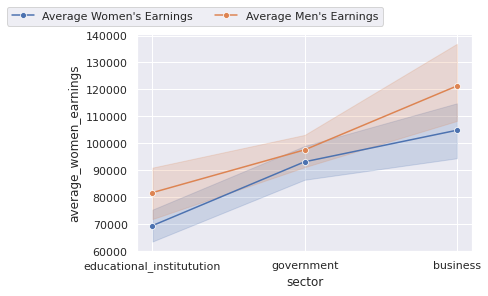

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

# Basic Line Plot
sns.lineplot(data=gender_gap_by_job_sector, x="sector", y="average_women_earnings", marker="o", label = "Average Women's Earnings")
sns.lineplot(data=gender_gap_by_job_sector, x="sector", y="average_men_earnings", marker="o", label = "Average Men's Earnings")

plt.legend(frameon = True, bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

This line plot illustrates the average earnings of women and men across different categories, with confidence intervals for each group. Across all categories, men consistently earn more than women, as represented by the orange line (men's earnings) being above the blue line (women's earnings) throughout the graph.  The gap between men's and women's earnings appears to grow slightly larger as we move from educational institution to government sector, then widens again when we move towards the business sector. This suggests that the gender wage gap becomes more pronounced in educational institutions and even more so in business. The consistent disparity across all categories underscores the need for further analysis of factors driving these differences. 



In [ ]:
# Sort the dataframe by 'percent_female' in descending order and more than 50% female
top_female_jobs = result[result['percent_female'] > .50 ].sort_values(by='percent_female', ascending=False).head(12)
print(top_female_jobs[['principal_job', 'sector', 'leadership_job_titles', 'percent_female']])


                     principal_job                     sector  \
18  management_related_occupations                   business   
16  management_related_occupations  educational_institutution   
20  management_related_occupations                 government   
7                     S&E_managers  educational_institutution   
6                     S&E_managers                   business   
19  management_related_occupations  educational_institutution   
8                     S&E_managers                 government   
24                non_S&E_managers  educational_institutution   
13  management_related_occupations  educational_institutution   
10                    S&E_managers  educational_institutution   
26                non_S&E_managers  educational_institutution   
17  management_related_occupations                 government   

           leadership_job_titles  percent_female  
18                personnel_mgmt            0.70  
16  other_management_occupations            0.70  
2

While observing the most female populated jobs and sectors, we can immediately notice that 7 of the sectors in these entries are the educational institutions. We can also observe that the percentage of workers in these roles that are female tends be lower in these female dominated fields as opposed to the percentage of male workers in male dominated field. This, however could be chalked up to the slightly higher portion of males in the workforce. 



In [ ]:
# Create a filter based on the top_female_jobs DataFrame
filter_conditions = (
    (data['principal_job'].isin(top_female_jobs['principal_job'])) &
    (data['sector'].isin(top_female_jobs['sector'])) &
    (data['leadership_job_titles'].isin(top_female_jobs['leadership_job_titles']))
)

# Apply the filter to get the relevant rows
femdom_field_workers = data[filter_conditions]

# Display the filtered dataframe
print(femdom_field_workers)


       salary  wkswk      earn  supwk  wamgmt  supdir  supind  \
0       60000     52   43000.0    0.0     1.0     NaN     NaN   
1       60000     52   60000.0    0.0     1.0     NaN     NaN   
15     127000     52  127000.0    1.0     1.0    40.0    16.0   
16      79000     52   75000.0    0.0     1.0     NaN     NaN   
22     190000     52  280000.0    1.0     1.0     5.0    50.0   
...       ...    ...       ...    ...     ...     ...     ...   
58160  170000     52  183000.0    1.0     1.0     1.0     0.0   
58161  145900     52  231286.0    1.0     1.0     1.0     0.0   
58163  165000     52  165000.0    1.0     1.0    33.0     0.0   
58173   34000     52   34019.0    0.0     0.0     NaN     NaN   
58206   21996     52   22731.0    0.0     1.0     NaN     NaN   

                                  emsmi  gender white  ... chun12 chu2  ch25  \
0           same_employer_different_job       1     0  ...    1.0  0.0   1.0   
1                same_employer_same_job       1     0  ... 

In [ ]:
# Sort the dataframe by 'percent_female' in ascending order and less than 50% female
lowest_female_jobs = result[result['percent_female'] < .50].sort_values(by='percent_female', ascending=True).head(12)
print(lowest_female_jobs)

       principal_job    leadership_job_titles                     sector  \
3       S&E_managers             eng_managers                   business   
1       S&E_managers     computer_it_managers  educational_institutution   
5       S&E_managers             eng_managers                 government   
0       S&E_managers     computer_it_managers                   business   
2       S&E_managers     computer_it_managers                 government   
21  non_S&E_managers          c_suite_manager                   business   
11      S&E_managers  natural_science_manager                 government   
4       S&E_managers             eng_managers  educational_institutution   
23  non_S&E_managers          c_suite_manager                 government   
25  non_S&E_managers  other_mid_level_manager                   business   
22  non_S&E_managers          c_suite_manager  educational_institutution   
9       S&E_managers  natural_science_manager                   business   

    number_

One detail worth noting when observing the principal jobs of the least female populated jobs and sector pairings, is that all of the roles are some form of managerial position either in science and engineering or not. Also three of these entries happen to also be c suite manager leadership roles. 



In [ ]:
# Create a filter based on the top_female_jobs DataFrame
male_filter_conditions = (
    (data['principal_job'].isin(lowest_female_jobs['principal_job'])) &
    (data['sector'].isin(lowest_female_jobs['sector'])) &
    (data['leadership_job_titles'].isin(lowest_female_jobs['leadership_job_titles']))
)

# Apply the filter to get the relevant rows
maledom_field_workers = data[male_filter_conditions]

# Display the filtered dataframe
print(maledom_field_workers)

       salary  wkswk      earn  supwk  wamgmt  supdir  supind  \
22     190000     52  280000.0    1.0     1.0     5.0    50.0   
26     230000     52  240000.0    1.0     1.0     7.0    20.0   
30     135000     52  135000.0    1.0     1.0     3.0     6.0   
37      65000     52   70000.0    1.0     1.0     1.0     4.0   
43     177000     52  173000.0    1.0     1.0     8.0    40.0   
...       ...    ...       ...    ...     ...     ...     ...   
58099   67599     52   67599.0    1.0     1.0     4.0    22.0   
58128   65000     52   65000.0    1.0     1.0     4.0     8.0   
58143   55000     52   50000.0    1.0     1.0     1.0     1.0   
58159  185000     52  200000.0    1.0     1.0     5.0    20.0   
58191  110000     52  130000.0    1.0     1.0     6.0    30.0   

                                  emsmi  gender white  ... chun12 chu2  ch25  \
22               same_employer_same_job       0     1  ...    NaN  NaN   NaN   
26               same_employer_same_job       0     0  ... 

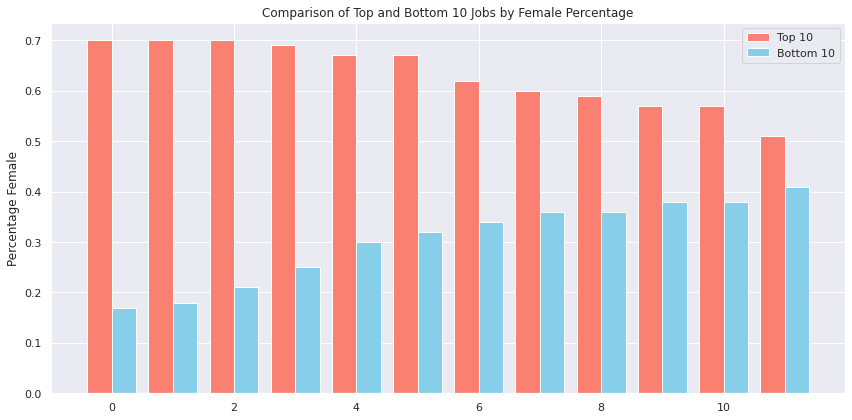

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for a grouped bar chart
combined_jobs = pd.concat([top_female_jobs, lowest_female_jobs], ignore_index=True)
combined_jobs["category"] = ["Top"] * len(top_female_jobs) + ["Bottom"] * len(
    lowest_female_jobs
)

# Separate x indices for each dataset
x_top = np.arange(len(top_female_jobs))  # x for top jobs
x_bottom = np.arange(len(lowest_female_jobs))  # x for bottom jobs

# Plotting
plt.figure(figsize=(12, 6))

# Plot Top 10 jobs
plt.bar(
    x_top - 0.2,
    top_female_jobs["percent_female"],
    width=0.4,
    label="Top 10",
    color="salmon",
    align="center",
)
# Plot Bottom 10 jobs
plt.bar(
    x_bottom + 0.2,
    lowest_female_jobs["percent_female"],
    width=0.4,
    label="Bottom 10",
    color="skyblue",
    align="center",
)

# Adjust x-axis labels
# plt.xticks(
#     np.arange(len(combined_jobs["principal_job"].unique())),
#     combined_jobs["principal_job"].unique(),
#     rotation=45,
#     ha="right",
# )
plt.ylabel("Percentage Female")
plt.title("Comparison of Top and Bottom 10 Jobs by Female Percentage")
plt.legend()

plt.tight_layout()
plt.show()


This bar chart compares the proportion of women in the 10 most female-dominated job positions (red bars) to the 10 most male-dominated job positions (blue bars). Each bar represents the percentage of women in a principal job category across different workforce sectors. In the most female-dominated positions (red bars), women represent a very high proportion (likely exceeding 50% and approaching 100%) across all 10 job categories. In contrast, the most male-dominated positions (blue bars) have significantly lower proportions of women, consistently below 50%. The stark difference between red and blue bars highlights occupational gender segregation, where some fields are almost exclusively female-dominated while others are heavily male-dominated. The data suggests occupational segregation, where certain sectors or job categories are predominantly associated with one gender. This segregation may stem from traditional gender roles, societal expectations, or historical hiring practices. 



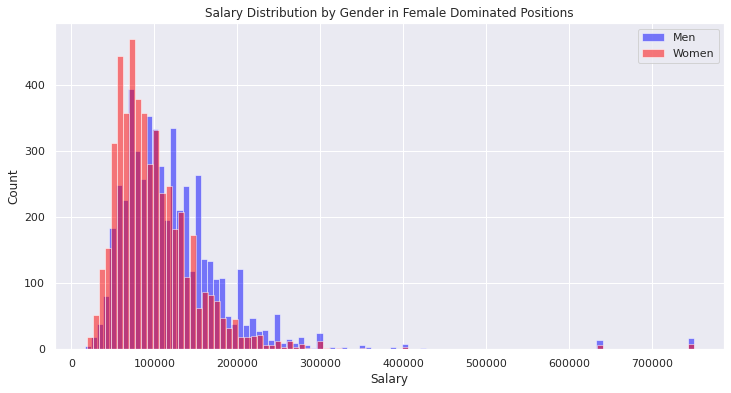

In [ ]:
import matplotlib.pyplot as pyplot

# Set the figure size
pyplot.figure(figsize=(12, 6))

# Filter the data for men and women who work full-time
men = femdom_field_workers[['salary']].loc[(femdom_field_workers['hrswk'] > 30) & (femdom_field_workers['gender'] == 0)]
women = femdom_field_workers[['salary']].loc[(femdom_field_workers['hrswk'] > 30) & (femdom_field_workers['gender'] == 1)]

# Plot histograms for men and women
pyplot.hist(men, bins=100, alpha=0.5, label='Men', color='blue')
pyplot.hist(women, bins=100, alpha=0.5, label='Women', color='red')

# Add axis labels and title
pyplot.xlabel('Salary')
pyplot.ylabel('Count')
pyplot.title('Salary Distribution by Gender in Female Dominated Positions')

# Add legend
pyplot.legend(loc='upper right')

# Show the plot
pyplot.show()

In [ ]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


<Figure size 576x432 with 0 Axes>

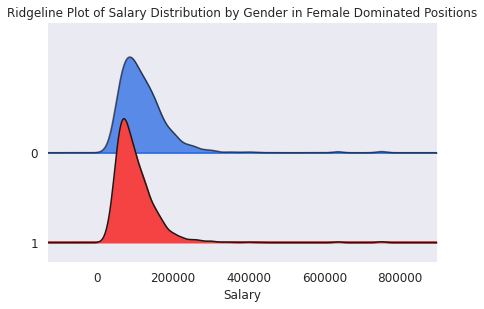

In [ ]:
import joypy

plt.figure(figsize=(8, 6))
joypy.joyplot(
    femdom_field_workers,
    by="gender",
    column="salary",
    colormap=plt.get_cmap("Set2"),
    color=['#1b61e3', '#f54242'],
    fade=True,
)
plt.title("Ridgeline Plot of Salary Distribution by Gender in Female Dominated Positions")
plt.xlabel("Salary")
plt.show()

In [ ]:
# Calculate the average salary for women (assuming 'gender' == 0 represents women)
avg_salary_women = femdom_field_workers.loc[femdom_field_workers['gender'] == 1, 'salary'].mean()

# Calculate the average salary for men (assuming 'gender' == 1 represents men)
avg_salary_men = femdom_field_workers.loc[femdom_field_workers['gender'] == 0, 'salary'].mean()

# Print the results
print(f"Average salary for women: {avg_salary_women}")
print(f"Average salary for men: {avg_salary_men}")


Average salary for women: 100305.82602712797
Average salary for men: 121542.74102116094


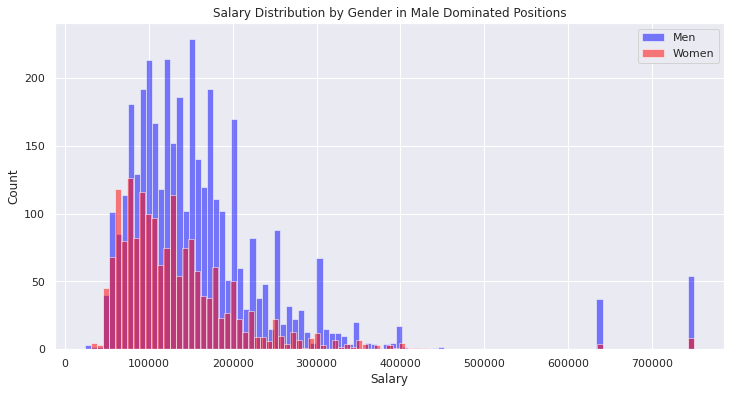

In [ ]:
import matplotlib.pyplot as pyplot

# Set the figure size
pyplot.figure(figsize=(12, 6))

# Filter the data for men and women who work full-time
men = maledom_field_workers[['salary']].loc[(maledom_field_workers['hrswk'] > 30) & (maledom_field_workers['gender'] == 0)]
women = maledom_field_workers[['salary']].loc[(maledom_field_workers['hrswk'] > 30) & (maledom_field_workers['gender'] == 1)]

# Plot histograms for men and women
pyplot.hist(men, bins=100, alpha=0.5, label='Men', color='blue')
pyplot.hist(women, bins=100, alpha=0.5, label='Women', color='red')

# Add axis labels and title
pyplot.xlabel('Salary')
pyplot.ylabel('Count')
pyplot.title('Salary Distribution by Gender in Male Dominated Positions')

# Add legend
pyplot.legend(loc='upper right')

# Show the plot
pyplot.show()

<Figure size 576x432 with 0 Axes>

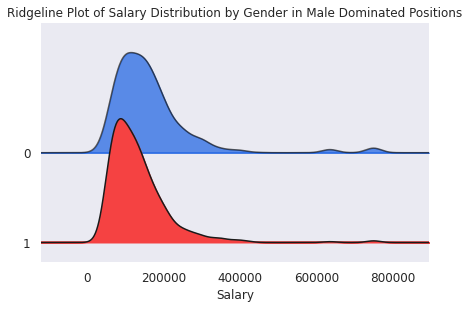

In [ ]:
import joypy

plt.figure(figsize=(8, 6))
joypy.joyplot(
    maledom_field_workers,
    by="gender",
    column="salary",
    colormap=plt.get_cmap("Set2"),
    color=['#1b61e3', '#f54242'],
    fade=True,
)
plt.title("Ridgeline Plot of Salary Distribution by Gender in Male Dominated Positions")
plt.xlabel("Salary")
plt.show()

In [ ]:
# Calculate the average salary for women (assuming 'gender' == 0 represents women)
avg_salary_women = maledom_field_workers.loc[maledom_field_workers['gender'] == 1, 'salary'].mean()

# Calculate the average salary for men (assuming 'gender' == 1 represents men)
avg_salary_men = maledom_field_workers.loc[maledom_field_workers['gender'] == 0, 'salary'].mean()

# Print the results
print(f"Average salary for women: {avg_salary_women}")
print(f"Average salary for men: {avg_salary_men}")


Average salary for women: 134401.37827510916
Average salary for men: 164633.4868488912


The distribution for women is tightly concentrated around a lower salary range, with a visible peak indicating most women earn relatively modest salaries. The distribution for men is more spread out and shifted toward higher salary ranges, indicating that men in these fields are earning significantly more at the higher end of the spectrum. Both men and women earn higher average salaries in male-dominated fields compared to female-dominated fields. The persistent pay gap across both field types could stem from systemic bias, gender-based discrimination, or differing access to opportunities such as promotions and high-responsibility roles. 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

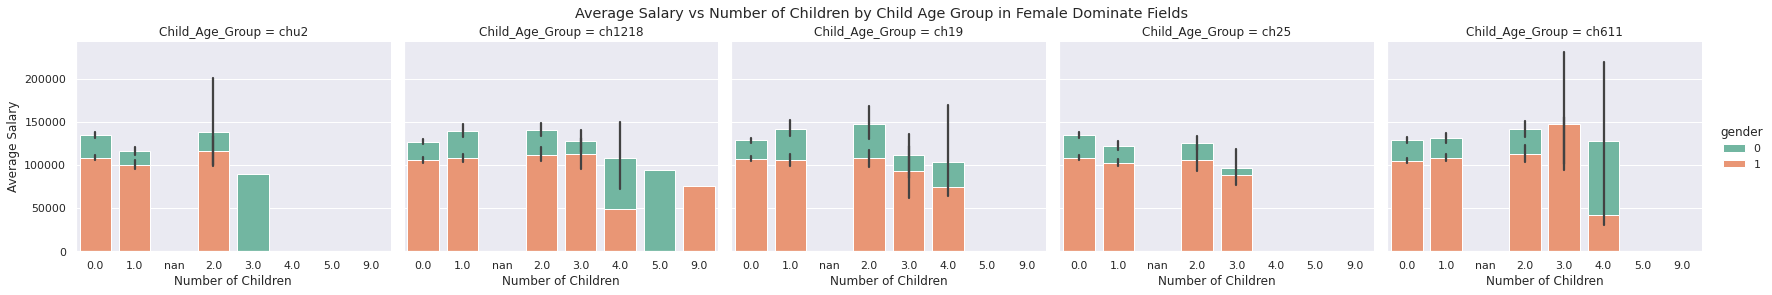

In [ ]:
# Define the columns to pair with 'salary'
child_columns = ['chu2', 'ch1218', 'ch19', 'ch25', 'ch611']

# Melt the dataframe to create a long format with 'salary' as the dependent variable
melted_data = femdom_field_workers.melt(
    id_vars=['salary', 'gender'],  # Keep 'salary' and 'gender' as identifier variables
    value_vars=child_columns,      # Melt the child-related columns
    var_name='Child_Age_Group',    # New column for variable names
    value_name='Number_of_Children'  # New column for values
)

# Create bar plots with FacetGrid
g = sns.FacetGrid(
    melted_data, 
    col="Child_Age_Group", 
    hue="gender", 
    sharey=True, 
    height=4, 
    aspect=1.2, 
    palette="Set2"
)
g.map(
    sns.barplot, 
    "Number_of_Children", 
    "salary", 
    order=sorted(melted_data["Number_of_Children"].unique())
)

# Add titles and legend
g.add_legend()
g.set_axis_labels("Number of Children", "Average Salary")
g.fig.suptitle("Average Salary vs Number of Children by Child Age Group in Female Dominate Fields", y=1.02)

plt.show()


Women consistently earn less on average than men across all child age groups and most child count categories.  There is no consistent trend showing a direct correlation between the number of children and women’s salaries, although salaries tend to decline slightly as the number of children increases in certain age groups. Men’s average salaries appear to fluctuate more with the number of children, often peaking around two or three children for certain age groups. Women’s salaries remain relatively flat regardless of the number of children in this category, suggesting that having very young children does not dramatically affect their earnings in female-dominated fields.  



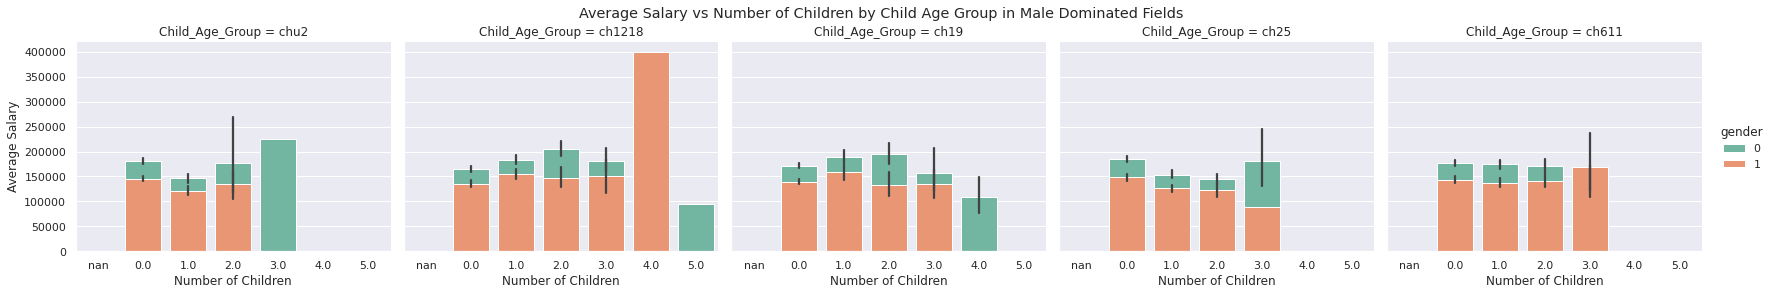

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to pair with 'salary'
child_columns = ['chu2', 'ch1218', 'ch19', 'ch25', 'ch611']

# Melt the dataframe to create a long format with 'salary' as the dependent variable
melted_data = maledom_field_workers.melt(
    id_vars=['salary', 'gender'],  # Keep 'salary' and 'gender' as identifier variables
    value_vars=child_columns,      # Melt the child-related columns
    var_name='Child_Age_Group',    # New column for variable names
    value_name='Number_of_Children'  # New column for values
)

# Create bar plots with FacetGrid
g = sns.FacetGrid(
    melted_data, 
    col="Child_Age_Group", 
    hue="gender", 
    sharey=True, 
    height=4, 
    aspect=1.2, 
    palette="Set2"
)
g.map(
    sns.barplot, 
    "Number_of_Children", 
    "salary", 
    order=sorted(melted_data["Number_of_Children"].unique())
)

# Add titles and legend
g.add_legend()
g.set_axis_labels("Number of Children", "Average Salary")
g.fig.suptitle("Average Salary vs Number of Children by Child Age Group in Male Dominated Fields", y=1.02)

plt.show()


Women consistently earn less than men across all child age groups and most child count categories. Women consistently earn less than men across all child age groups and most child count categories. Men’s salaries tend to fluctuate but generally remain higher than women’s salaries. Men’s earnings are relatively stable or increase with more children in certain age group. Men’s earnings are relatively stable or increase with more children in certain age groups. 



Variance Inflation Factors:
                         Variable       VIF
0                           const  2.893871
1                          gender  1.009599
2  principal_job_non_S&E_managers  1.009599
Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.910
Model:                            WLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.617e+04
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:09:30   Log-Likelihood:                -145.00
No. Observations:                3212   AIC:                             296.0
Df Residuals:                    3209   BIC:                             314.2
Df Model:                           2                                         
Covariance Type:            nonrobust          

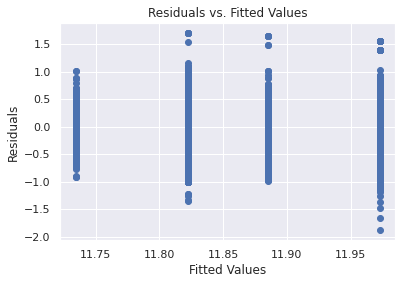

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.910
Model:                            WLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     9172.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:09:30   Log-Likelihood:                -145.00
No. Observations:                3212   AIC:                             296.0
Df Residuals:                    3209   BIC:                             314.2
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import WLS


df = maledom_field_workers[["salary", "gender", "principal_job"]].loc[
    (maledom_field_workers["employer_type"] == "private_for_profit_org")
    & (~maledom_field_workers["principal_job"].str.contains("teacher", case=False, na=False))
    & (maledom_field_workers["sector"] == "business")
]


columns_to_encode = ["principal_job"]  # if it is a categorical variable (likely)

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded["log_salary"] = np.log(df_encoded["salary"])  # choose salary or earnings

# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(["salary", "log_salary"], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF values (>5 or >10)
#df_encoded.drop(columns=["high_vif_variable"], inplace=True)


# Split the data into training and testing sets for cross-validation
X = df_encoded.drop(["salary", "log_salary"], axis=1)
y = df_encoded["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")


plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

model_robust = model_wls.get_robustcov_results(cov_type="HC3")
print("Model Summary with Robust Standard Errors:")
print(model_robust.summary())

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

## Interpreting our exponentiated coefficients:



In [ ]:
coefficients = model_wls.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                             145083.911540
gender                                 0.860082
principal_job_non_S&E_managers         1.091755
dtype: float64


## Conduct a Mediation Analysis:



In [ ]:
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

your_measure_of_occ_segregation_dummies = [col for col in df_encoded.columns if col.startswith('principal_job')] #replace with principal_job with your prefix for your categorical variable
X_no_mediator = X_train.drop(columns=your_measure_of_occ_segregation_dummies)
X_no_mediator = sm.add_constant(X_no_mediator)

model_no_mediator = sm.OLS(y_train, X_no_mediator).fit()
gender_effect_no_mediator = model_no_mediator.params['gender']  # Coefficient of gender without mediator

X_with_mediator = sm.add_constant(X_train)
model_with_mediator = sm.OLS(y_train, X_with_mediator).fit()
gender_effect_with_mediator = model_with_mediator.params['gender']  # Coefficient of gender with mediator

explained_percent = ((gender_effect_no_mediator - gender_effect_with_mediator) / gender_effect_no_mediator) * 100

print(f"Gender effect without mediator: {gender_effect_no_mediator}")
print(f"Gender effect with mediator: {gender_effect_with_mediator}")
print(f"Percentage of gender gap in female dominated fields explained by principal_job: {explained_percent:.2f}%")



Gender effect without mediator: -0.14204065363613863
Gender effect with mediator: -0.15128914186938833
Percentage of gender gap in female dominated fields explained by principal_job: -6.51%


## Including Gender Differences in Degree Fields (Highest Degree)



In [ ]:
# import jinja2
# raw_query = """
#     select 
#         highest_general_degree_field,
#         highest_degree_type,
#         highest_degree_field,
#         concat(highest_degree_type,'_', highest_degree_field),
#         count(*) as respondents_count
#     from data 
#     group by 1, 2, 3, 4
#     order by 1, 2
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
maledom_field_workers = maledom_field_workers.copy()
maledom_field_workers.loc[:, "highest_degree_type_field"] = (
    maledom_field_workers["highest_degree_type"]
    + "_"
    + maledom_field_workers["highest_degree_field"]
)

Variance Inflation Factors:
                                              Variable         VIF
0                                                const  446.509161
1                                               gender    1.137670
2    highest_degree_type_field_Bachelors_aerospace_eng    2.547106
3     highest_degree_type_field_Bachelors_ag_economics    1.664605
4    highest_degree_type_field_Bachelors_agricultur...    3.096977
..                                                 ...         ...
117         highest_degree_type_field_Masters_theology    1.332552
118  highest_degree_type_field_Professional_compute...    1.111709
119  highest_degree_type_field_Professional_health_...    1.664203
120         highest_degree_type_field_Professional_law    3.644781
121  highest_degree_type_field_Professional_psychol...    1.111709

[122 rows x 2 columns]
Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             

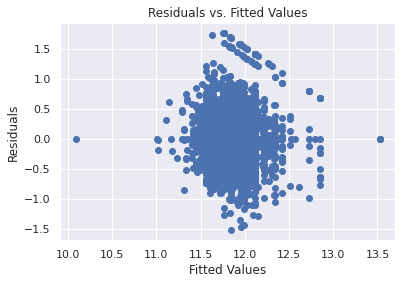

Model Summary with Robust Standard Errors:
Error in calculating robust covariance results: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Test Mean Squared Error: 0.23043825316127656
/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:2013: RuntimeWarning: divide by zero encountered in divide
  self.het_scale = (self.wresid / (1 - h))**2


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import WLS
import matplotlib.pyplot as plt


df = (
    maledom_field_workers[["salary", "gender", "highest_degree_type_field"]]
    .loc[
        (maledom_field_workers["employer_type"] == "private_for_profit_org")
        & (
            ~maledom_field_workers["principal_job"].str.contains(
                "teacher", case=False, na=False
            )
        )
        & (maledom_field_workers["sector"] == "business")
    ]
    .copy()
)


columns_to_encode = [
    "highest_degree_type_field"
]  # if it is a categorical variable (likely)

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded["log_salary"] = np.log(df_encoded["salary"])  # choose salary or earnings

# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(["salary", "log_salary"], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF values (>5 or >10)
# df_encoded.drop(columns=["high_vif_variable"], inplace=True)


# Split the data into training and testing sets for cross-validation
X = df_encoded.drop(["salary", "log_salary"], axis=1)
y = df_encoded["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2 + 1e-10)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")


plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

try:
    model_robust = model_wls.get_robustcov_results(cov_type="HC3")
    print("Model Summary with Robust Standard Errors:")
    print(model_robust.summary())
except ValueError as e:
    print(f"Error in calculating robust covariance results: {e}")

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [ ]:
coefficients = model_wls.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                                                             211326.543072
gender                                                                 0.888149
highest_degree_type_field_Bachelors_aerospace_eng                      0.694224
highest_degree_type_field_Bachelors_ag_economics                       0.729177
highest_degree_type_field_Bachelors_agricultural_sciences              0.512428
                                                                      ...      
highest_degree_type_field_Masters_theology                             0.113568
highest_degree_type_field_Professional_computer_eng                    1.065590
highest_degree_type_field_Professional_health_medical_sciences         1.290299
highest_degree_type_field_Professional_law                             0.897666
highest_degree_type_field_Professional_psycholology                    1.918062
Length: 122, dtype: float64


In [ ]:
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

your_measure_of_occ_segregation_dummies = [col for col in df_encoded.columns if col.startswith('highest_degree_type_field')] #replace with principal_job with your prefix for your categorical variable
X_no_mediator = X_train.drop(columns=your_measure_of_occ_segregation_dummies)
X_no_mediator = sm.add_constant(X_no_mediator)

model_no_mediator = sm.OLS(y_train, X_no_mediator).fit()
gender_effect_no_mediator = model_no_mediator.params['gender']  # Coefficient of gender without mediator

X_with_mediator = sm.add_constant(X_train)
model_with_mediator = sm.OLS(y_train, X_with_mediator).fit()
gender_effect_with_mediator = model_with_mediator.params['gender']  # Coefficient of gender with mediator

explained_percent = ((gender_effect_no_mediator - gender_effect_with_mediator) / gender_effect_no_mediator) * 100

print(f"Gender effect without mediator: {gender_effect_no_mediator}")
print(f"Gender effect with mediator: {gender_effect_with_mediator}")
print(f"Percentage of gender gap in male dominated fields explained by principal_job: {explained_percent:.2f}%")



Gender effect without mediator: -0.14204065363613863
Gender effect with mediator: -0.12062364711658183
Percentage of gender gap in male dominated fields explained by principal_job: 15.08%


## Family Structure

Conduct a mediation analysis on gender and family structure



In [ ]:
# import jinja2
# raw_query = """
#     select 
#         marsta,
#         partner_work,
#         gender,
#         partnered_with_children,
#         chlvin,
#         if ( 
#             gender = 0 
#             and partner_work ='non_working'
#             and marsta ='married'
#             and chlvin = 1,
#             1,
#             0
#         ) as traditional_family,
#         count(*) as respondents_count,
#         round(avg(agegr)) as average_age,
#         round(avg(salary),2) as avg_salary
#     
#     from maledom_field_workers
#     where private_corp = 1
#     group by 1, 2, 3, 4, 5, 6
#     order by 1, 2, 3, 4
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Variance Inflation Factors:
                     Variable         VIF
0                       const  641.551870
1                      gender    1.042648
2  marsta_living_with_partner    2.181286
3              marsta_married    4.759070
4        marsta_never_married    3.785091
5            marsta_separated    1.194689
6              marsta_widowed    1.097587
7                    chlvin_1    1.265114
8                  log_salary    1.087697
Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.720e+28
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:09:41   Log-Likelihood:                 94365.
No. Observations:                3212   

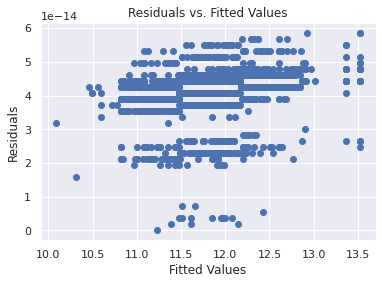

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.592e+28
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:09:41   Log-Likelihood:                 94365.
No. Observations:                3212   AIC:                        -1.887e+05
Df Residuals:                    3203   BIC:                        -1.887e+05
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
df = maledom_field_workers[["salary", "gender", "marsta", "chlvin"]].loc[
    (maledom_field_workers["employer_type"] == "private_for_profit_org")
    & (
        ~maledom_field_workers["principal_job"].str.contains(
            "teacher", case=False, na=False
        )
    )
    & (maledom_field_workers["sector"] == "business")
]


columns_to_encode_marsta = ["marsta"]  # if it is a categorical variable (likely)

marsta_encoded = pd.get_dummies(df, columns=columns_to_encode_marsta, drop_first=True)

# ENCODE CHILDREN
columns_to_encode_chlvin = ["chlvin"]  # if it is a categorical variable (likely)

chlvin_encoded = pd.get_dummies(
    marsta_encoded, columns=columns_to_encode_chlvin, drop_first=True
)

# Log-transform the salary to stabilize variance
df_encoded = chlvin_encoded.copy()

df_encoded["log_salary"] = np.log(df_encoded["salary"])

df_encoded

# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(["salary"], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF values (>5 or >10)
# df_encoded.drop(columns=["high_vif_variable"], inplace=True)  # Uncomment and replace with actual variable name if needed


# Split the data into training and testing sets for cross-validation
X = df_encoded.drop(["salary"], axis=1)
y = df_encoded["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2 + 1e-10)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")


plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

model_robust = model_wls.get_robustcov_results(cov_type="HC3")
print("Model Summary with Robust Standard Errors:")
print(model_robust.summary())

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [ ]:
coefficients = model_wls.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                         1.000000
gender                        1.000000
marsta_living_with_partner    1.000000
marsta_married                1.000000
marsta_never_married          1.000000
marsta_separated              1.000000
marsta_widowed                1.000000
chlvin_1                      1.000000
log_salary                    2.718282
dtype: float64


In [ ]:
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

your_measure_of_occ_segregation_dummies = [col for col in df_encoded.columns if col.startswith('marsta')] #replace with principal_job with your prefix for your categorical variable
X_no_mediator = X_train.drop(columns=your_measure_of_occ_segregation_dummies)
X_no_mediator = sm.add_constant(X_no_mediator)

model_no_mediator = sm.OLS(y_train, X_no_mediator).fit()
gender_effect_no_mediator = model_no_mediator.params['gender']  # Coefficient of gender without mediator

X_with_mediator = sm.add_constant(X_train)
model_with_mediator = sm.OLS(y_train, X_with_mediator).fit()
gender_effect_with_mediator = model_with_mediator.params['gender']  # Coefficient of gender with mediator

explained_percent = ((gender_effect_no_mediator - gender_effect_with_mediator) / gender_effect_no_mediator) * 100

print(f"Gender effect without mediator: {gender_effect_no_mediator}")
print(f"Gender effect with mediator: {gender_effect_with_mediator}")
print(f"Percentage of gender gap in male dominated fields explained by marital status and children in the home: {explained_percent:.2f}%")



Gender effect without mediator: -0.12886366880263356
Gender effect with mediator: -0.10768289217316056
Percentage of gender gap in male dominated fields explained by marital status and children in the home: 16.44%


In [ ]:
# import jinja2
# raw_query = """
#     select 
#         marsta,
#         partner_work,
#         gender,
#         partnered_with_children,
#         chlvin,
#         if ( 
#             gender = 0 
#             and partner_work ='non_working'
#             and marsta ='married'
#             and chlvin = 1,
#             1,
#             0
#         ) as traditional_family,
#         count(*) as respondents_count,
#         round(avg(agegr)) as average_age,
#         round(avg(salary),2) as avg_salary
#     
#     from femdom_field_workers
#     where private_corp = 1
#     group by 1, 2, 3, 4, 5, 6
#     order by 1, 2, 3, 4
# """
# sql_query = jinja2.Template(raw_query).render(vars())

Variance Inflation Factors:
                     Variable         VIF
0                       const  632.067154
1                      gender    1.041842
2  marsta_living_with_partner    2.351510
3              marsta_married    5.490824
4        marsta_never_married    4.815921
5            marsta_separated    1.150247
6              marsta_widowed    1.108276
7                    chlvin_1    1.352289
8                  log_salary    1.106153
Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.893e+30
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:09:42   Log-Likelihood:             1.6241e+05
No. Observations:                5160   

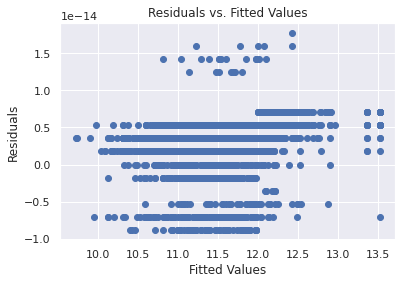

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.015e+30
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:09:42   Log-Likelihood:             1.6241e+05
No. Observations:                5160   AIC:                        -3.248e+05
Df Residuals:                    5151   BIC:                        -3.247e+05
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
df = femdom_field_workers[["salary", "gender", "marsta", "chlvin"]].loc[
    (femdom_field_workers["employer_type"] == "private_for_profit_org")
    & (
        ~femdom_field_workers["principal_job"].str.contains(
            "teacher", case=False, na=False
        )
    )
    & (femdom_field_workers["sector"] == "business")
]


columns_to_encode_marsta = ["marsta"]  # if it is a categorical variable (likely)

marsta_encoded = pd.get_dummies(df, columns=columns_to_encode_marsta, drop_first=True)

# ENCODE CHILDREN
columns_to_encode_chlvin = ["chlvin"]  # if it is a categorical variable (likely)

chlvin_encoded = pd.get_dummies(
    marsta_encoded, columns=columns_to_encode_chlvin, drop_first=True
)

# Log-transform the salary to stabilize variance
df_encoded = chlvin_encoded.copy()

df_encoded["log_salary"] = np.log(df_encoded["salary"])

df_encoded

# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(["salary"], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF values (>5 or >10)
# df_encoded.drop(columns=["high_vif_variable"], inplace=True)  # Uncomment and replace with actual variable name if needed


# Split the data into training and testing sets for cross-validation
X = df_encoded.drop(["salary"], axis=1)
y = df_encoded["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2 + 1e-10)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")


plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

model_robust = model_wls.get_robustcov_results(cov_type="HC3")
print("Model Summary with Robust Standard Errors:")
print(model_robust.summary())

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [ ]:
coefficients = model_wls.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                         1.000000
gender                        1.000000
marsta_living_with_partner    1.000000
marsta_married                1.000000
marsta_never_married          1.000000
marsta_separated              1.000000
marsta_widowed                1.000000
chlvin_1                      1.000000
log_salary                    2.718282
dtype: float64


In [ ]:
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

your_measure_of_occ_segregation_dummies = [col for col in df_encoded.columns if col.startswith('marsta')] #replace with principal_job with your prefix for your categorical variable
X_no_mediator = X_train.drop(columns=your_measure_of_occ_segregation_dummies)
X_no_mediator = sm.add_constant(X_no_mediator)

model_no_mediator = sm.OLS(y_train, X_no_mediator).fit()
gender_effect_no_mediator = model_no_mediator.params['gender']  # Coefficient of gender without mediator

X_with_mediator = sm.add_constant(X_train)
model_with_mediator = sm.OLS(y_train, X_with_mediator).fit()
gender_effect_with_mediator = model_with_mediator.params['gender']  # Coefficient of gender with mediator

explained_percent = ((gender_effect_no_mediator - gender_effect_with_mediator) / gender_effect_no_mediator) * 100

print(f"Gender effect without mediator: {gender_effect_no_mediator}")
print(f"Gender effect with mediator: {gender_effect_with_mediator}")
print(f"Percentage of gender gap in female dominated fields explained by marital status and children in the home: {explained_percent:.2f}%")



Gender effect without mediator: -0.16705511824145208
Gender effect with mediator: -0.1493168596703743
Percentage of gender gap in female dominated fields explained by marital status and children in the home: 10.62%


This mediation analysis explores the gender wage gap in both female-dominated and male-dominated fields, focusing on the extent to which marital status and children in the home explain the observed disparities.  In female dominated fields, the unmediated gender effect on wages is −0.1671. After accounting for marital status and children in the home, the gender effect reduces slightly to −0.1493. 10.62% of the gender wage gap in female-dominated fields is explained by marital status and children in the home. In male dominated fields The unmediated gender effect on wages is −0.1289. After accounting for marital status and children in the home, the gender effect reduces more substantially to −0.1077. 16.44% of the gender wage gap in male-dominated fields is explained by marital status and children in the home. The overall gender wage gap (both before and after mediation) is larger in female-dominated fields. Even after accounting for marital status and children in the home, female-dominated fields retain a larger gender effect. Marital status and children in the home explain a greater proportion of the gender wage gap in male-dominated fields (16.44%) compared to female-dominated fields (10.62%). This suggests that these mediators play a more substantial role in shaping gender disparities in male-dominated fields. In conclusion, marital status and the presence of children in the home play an important, though not uniform, role in explaining the gender wage gap across different fields of work. These mediators have a more pronounced explanatory power in male-dominated fields, where they account for 16.44% of the gap, compared to 10.62% in female-dominated fields. However, the persistent gender effect even after accounting for these mediators highlights the need for further investigation into structural and cultural factors influencing wage disparities. 

